In [61]:
!pip install seaborn

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
laptopdata = pd.read_csv("datasets/laptops.csv", encoding = "ISO-8859-1",index_col=0)
laptopdata.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## Shape will return no of rows and no of columns

In [64]:
laptopdata.shape

(1303, 12)

## inplace = true --> do the mentioned operation in the dataframe itself, 
## if false would have returned new dataframe with the dropped column
## axis = 1 , is for columns

In [65]:
laptopdata.drop(['Product', 
                 'ScreenResolution', 
                 'Cpu',
                 'Memory', 
                 'Gpu',
                 'Weight'], inplace=True, axis = 1)

In [66]:
laptopdata.head()

,Company,TypeName,Inches,Ram,OpSys,Price_euros
1,Apple,Ultrabook,13.3,8GB,macOS,1339.69
2,Apple,Ultrabook,13.3,8GB,macOS,898.94
3,HP,Notebook,15.6,8GB,No OS,575.00
4,Apple,Ultrabook,15.4,16GB,macOS,2537.45
5,Apple,Ultrabook,13.3,8GB,macOS,1803.60


In [67]:
laptopdata["TypeName"].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [68]:
laptopdata["TypeName"].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

## By dafault value_counts return the count in descending order, if you dont want the sorting then use sort= False

In [69]:
laptopdata["TypeName"].value_counts(sort=False)

Netbook                25
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Gaming                205
Notebook              727
Name: TypeName, dtype: int64

## To sort the values in ascending order, sort_values(ascending=True)

In [70]:
laptopdata["TypeName"].value_counts().sort_values(ascending=True)

Netbook                25
Workstation            29
2 in 1 Convertible    121
Ultrabook             196
Gaming                205
Notebook              727
Name: TypeName, dtype: int64

In [71]:
laptopdata["TypeName"].groupby(laptopdata["Company"]).value_counts().sort_values(ascending=False)

Company    TypeName          
HP         Notebook              184
Lenovo     Notebook              178
Dell       Notebook              165
Acer       Notebook               78
Asus       Notebook               67
MSI        Gaming                 54
Asus       Gaming                 54
Dell       Ultrabook              49
Lenovo     2 in 1 Convertible     48
Dell       Gaming                 40
Toshiba    Notebook               36
HP         Ultrabook              36
Lenovo     Gaming                 32
           Ultrabook              31
Dell       2 in 1 Convertible     30
Apple      Ultrabook              21
Asus       Ultrabook              20
HP         2 in 1 Convertible     19
           Workstation            14
Asus       2 in 1 Convertible     13
Toshiba    Ultrabook              12
HP         Gaming                 12
Dell       Workstation            11
HP         Netbook                 9
Acer       2 in 1 Convertible      8
           Gaming                  8
Mediacom

##  bins argument. This parameter allows us to specificy the number of bins (or groups we want to split the data into) 
## as an integer. In the example below I have added bins=5 to split the Price_euros into 5 groups. 

In [72]:
laptopdata["Price_euros"].value_counts(bins=5)

(168.07399999999998, 1359.0]    922
(1359.0, 2544.0]                329
(2544.0, 3729.0]                 45
(3729.0, 4914.0]                  5
(4914.0, 6099.0]                  2
Name: Price_euros, dtype: int64

## For a bar chart, you first need to create a series of counts of each unique value (use the pandas value_counts() function) and then proceed to plot the resulting series of counts using the pandas series plot() function.

## The plot() function plots a line chart of the series values by default but you can specify the type of chart to plot using the kind parameter. To plot a bar chart, pass ‘bar’ to the kind parameter. 

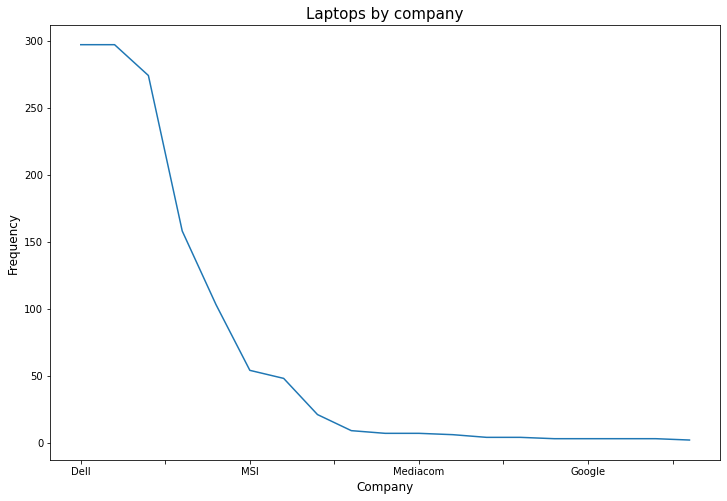

In [73]:
plt.figure(figsize=(12,8))
laptopdata["Company"].value_counts().plot(kind="bar")
plt.title('Laptops by company', fontsize=15)

plt.xlabel('Company', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

### A Box Plot is also known as Whisker plot is created to display the summary of the set of data values having properties 
### like minimum, first quartile, median, third quartile and maximum.
### In the box plot, a box is created from the first quartile to the third quartile, a vertical line is also there which goes through the box at the median.
### Here x-axis denotes the data to be plotted while the y-axis shows the frequency distribution.



<AxesSubplot:>

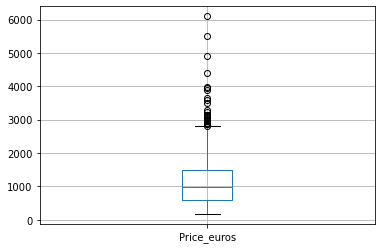

In [74]:
laptopdata[["Price_euros"]].boxplot()

{'whiskers': [<matplotlib.lines.Line2D at 0x82190c7940>,
 'caps': [<matplotlib.lines.Line2D at 0x82190d3040>,
 'boxes': [<matplotlib.lines.Line2D at 0x82190c75e0>],
 'medians': [<matplotlib.lines.Line2D at 0x82190d3700>],
 'fliers': [<matplotlib.lines.Line2D at 0x82190d3a60>],
 'means': []}

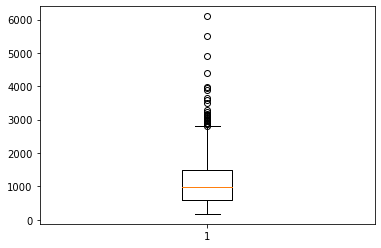

In [75]:
plt.boxplot(laptopdata[["Price_euros"]])

<AxesSubplot:title={'center':'Price_euros'}, xlabel='Company'>

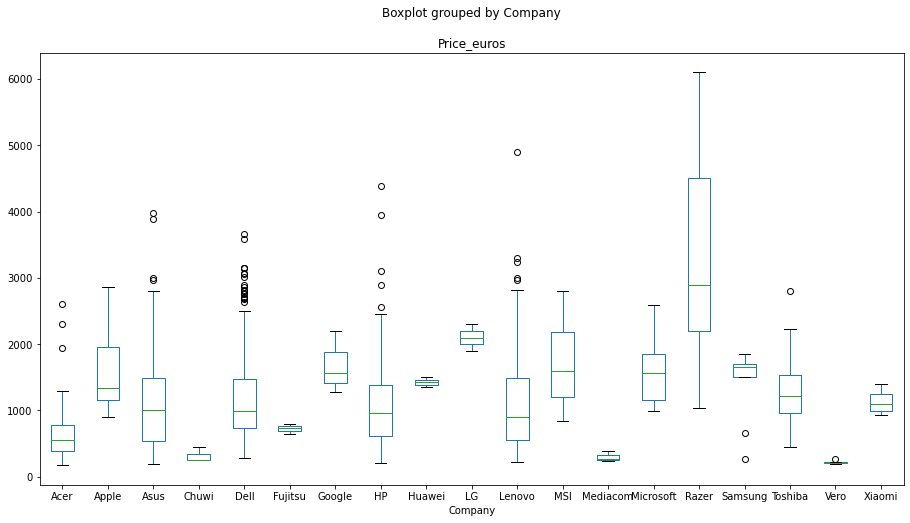

In [80]:
laptopdata.boxplot(by='Company', column=["Price_euros"], grid=False,figsize=(15,8))

### So far we have used matplot lib , lets use swarmplot

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


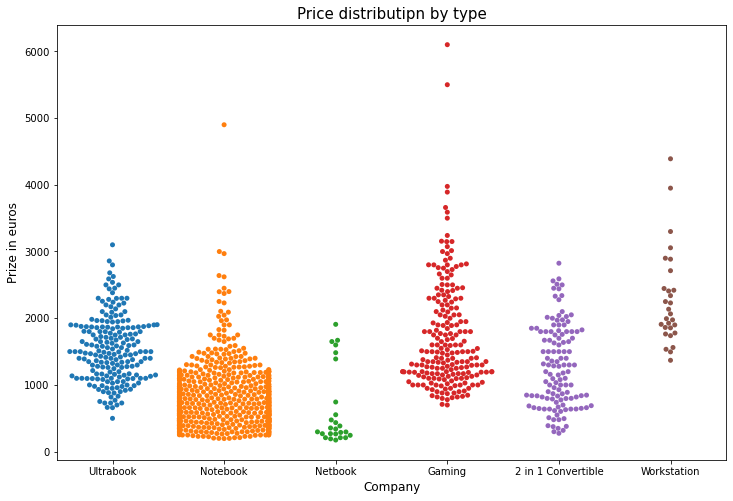

In [77]:
plt.figure(figsize=(12,8))
sns.swarmplot(x="TypeName",y= "Price_euros", data= laptopdata)
plt.title('Price distributipn by type', fontsize=15)

plt.xlabel('Company', fontsize=12)
plt.ylabel('Prize in euros', fontsize=12)
plt.show()